In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from gt_design import *

Import all the data

In [2]:
data_efficiency = pd.read_csv(r'_outputs\output_data_efficiency.csv')
data_root_hub = pd.read_csv(r'_outputs\output_data_root_hub.csv')
data_off_design = pd.read_csv(r'_outputs\output_data_off_design.csv')
data_meanline = pd.read_csv(r'_outputs\output_data_meanline.csv')
data_meanline_losses = pd.read_csv(r'_outputs\output_data_meanline_losses.csv')
data_scratch = pd.read_csv(r'_outputs\output_data_scratch.csv')

Optimization

In [3]:
data_efficiency['delta_eta_optimize_normalized'] = (data_efficiency['delta_eta_optimize'] - data_efficiency['delta_eta_optimize'].min()) / (data_efficiency['delta_eta_optimize'].max() - data_efficiency['delta_eta_optimize'].min())
data_meanline_losses['N_rotor_normalized'] = (data_meanline_losses['N_rotor'] - data_meanline_losses['N_rotor'].min()) / (data_meanline_losses['N_rotor'].max() - data_meanline_losses['N_rotor'].min())
data_meanline['AN_squared_normalized'] = (data_meanline['AN_squared'] - data_meanline['AN_squared'].min()) / (data_meanline['AN_squared'].max() - data_meanline['AN_squared'].min())
data_efficiency['eta_opt'] = 1/data_efficiency['eta_final']
data_efficiency['eta_opt_normalized'] = (data_efficiency['eta_opt'] - data_efficiency['eta_opt'].min()) / (data_efficiency['eta_opt'].max() - data_efficiency['eta_opt'].min())

In [4]:
# OPTIMIZATION FUNCTION
data_efficiency['func_optimize'] = 0.4 * (data_efficiency['eta_opt_normalized']) + 0.3 * (data_meanline_losses['N_rotor_normalized']) + 0.2 * (data_efficiency['delta_eta_optimize_normalized']) + 0.5 * data_meanline['AN_squared_normalized']

Print Results

In [5]:
ind = data_efficiency['func_optimize'].idxmin()
data_efficiency.iloc[ind]

eta_tt                           90.263329
eta_final                         0.885039
eta_final_od                      0.869563
eta_final_od_new                  0.872134
eta_final_opt                     1.129894
delta_eta_optimize                0.012905
delta_eta_optimize_normalized     0.049198
eta_opt                           1.129894
eta_opt_normalized                0.000000
func_optimize                     0.386763
Name: 10145, dtype: float64

In [6]:
data_root_hub.iloc[ind]

reaction_hub        0.409614
h                   0.020741
r_tip               0.096554
U_tip             406.928436
r_hub               0.075813
r_tip_stator        0.099385
r_hub_stator        0.072982
h_vane_mean         0.026403
alpha_2_hub        71.656362
alpha_3_hub        26.121690
beta_2_hub         49.213387
beta_3_hub         57.562670
U_hub             319.514132
V_2_hub           263.398619
C_2_hub           546.727153
M_2_rel_hub         0.406767
M_2_hub             0.844312
reaction_hub.1      0.409614
alpha_2_tip        67.106913
alpha_3_tip        21.058045
beta_2_tip          0.179832
beta_3_tip         60.457902
U_tip.1           406.928436
V_2_tip           172.064342
C_2_tip           442.308052
M_2_rel_tip         0.262560
M_2_tip             0.674936
M_3_rel_tip         0.968268
Name: 10145, dtype: float64

In [7]:
data_off_design.iloc[ind]

T_3_od                988.879094
rho_3_od                1.484518
P_3_od                421.318664
alpha_3_od             29.905357
beta_2_od              36.987615
flow_coeff_2_od         0.526350
incidence_2             8.524698
incidence_off           4.524698
v_2_od                215.411753
C_w_3_od              172.890410
C_a_3_od              300.600601
U_mean_od             326.899155
flow_coeff_3_od         0.919551
work_od_cw         205747.191324
work_od_vw         205747.191324
M_2_rel_od              0.328706
M_3_rel_od              0.948100
Name: 10145, dtype: float64

In [8]:
data_meanline.iloc[ind]

stage_loading            3.214286e+00
reaction_meanline        5.266010e-01
flow_coefficient_2       4.737153e-01
flow_coefficient_3       8.121638e-01
omega                    4.214507e+03
AN_squared               1.819183e+07
T_01                     1.245321e+03
T_1                      1.242086e+03
P_01                     1.182074e+03
P_1                      1.169840e+03
rho_1                    3.281655e+00
T_02                     1.225948e+03
T_2                      1.122290e+03
P_02                     1.182067e+03
P_02_rel                 8.806631e+02
P_2                      8.301847e+02
rho_2                    2.577435e+00
T_03                     1.041254e+03
T_3                      9.890307e+02
P_03                     5.179223e+02
P_03_rel                 7.432638e+02
P_3                      4.335581e+02
rho_3                    1.527410e+00
A_1                      1.736358e-02
A_2                      1.123156e-02
A_3                      1.123156e-02
M_1         

In [9]:
data_meanline_losses.iloc[ind]

c_true_stator             0.052807
c_a_stator                0.029256
stagger_angle_stator     56.356813
K_p_stator                0.027602
K_s_stator                0.097244
K_TET_stator              0.009733
K_stator                  0.134580
c_true_rotor              0.015955
c_a_rotor                 0.014141
stagger_angle_rotor      27.583311
K_p_rotor                 0.029181
K_s_rotor                 0.079922
K_TET_rotor               0.021612
K_rotor                   0.130715
pitch_stator              0.040356
zweifel_stator            0.850000
N_stator                 13.000000
pitch_rotor               0.010865
zweifel_rotor             0.900000
N_rotor                  49.000000
throat_opening_stator     0.014234
throat_opening_rotor      0.005600
N_rotor_normalized        1.000000
Name: 10145, dtype: float64

In [10]:
data_scratch.iloc[ind]

zweifel_stator_NEW    0.877338
zweifel_rotor_NEW     0.915409
Name: 10145, dtype: float64

In [3]:
stagger_hub = aerodynamic_losses.profile_losses.figure_2_5(49.213387, 57.562670)
print("stagger_hub = ", stagger_hub)
stagger_tip = aerodynamic_losses.profile_losses.figure_2_5(0.179832, 60.457902)
print("stagger_tip = ", stagger_tip)

stagger_hub =  18.55313828002359
stagger_tip =  39.20531172652326


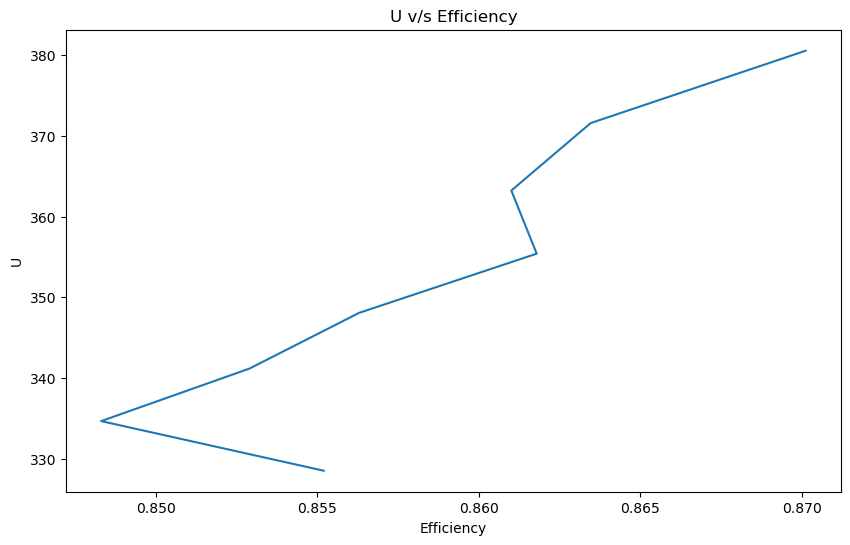

In [12]:
master_data = pd.read_csv(r'_outputs\master_data.csv')

master_data = master_data.drop_duplicates(subset=['U'])

#x = master_data['eta_final']
#y = master_data['U']

def clean_data(df):
    df = df[df['zweifel_rotor'] == 0.9]
    return df

df_clean = clean_data(master_data.copy())
df_clean.head()

x = df_clean['eta_final']
y = df_clean['U']

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title('U v/s Efficiency')
plt.xlabel('Efficiency')
plt.ylabel('U')
plt.show()